* T2K + NOvA flux + osc (+ int?)
* L/E MiniBooNE, T2K, NOvA, DUNE
* Osc examples: dm32, th23, dcp

In [1]:
import pyNUISANCE as pn
import pyNuHepMC as nhm

Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/t2kreweight-build/_deps/niwg-src/src/NIWG/Interface/NIWGEvent.h
   requested to autoload type niwg::NIWGParticle
Error in cling::AutoLoadingVisitor::InsertIntoAutoLoadingState:
   Missing FileEntry for /opt/t2kreweight-build/_deps/niwg-src/src/NIWG/Interface/NIWGEvent.h
   requested to autoload type niwg::NIWGEvent


Welcome to JupyROOT 6.30/04


In [2]:
T2K_Flux = pn.convert.ROOT.get_EnergyDistribution_from_ROOT(\
    "/root/software/NUISANCEMC/nuisance/build/Linux/data/flux/t2kflux_2016_plus250kA.root",
    "enu_sk_numu", "GEV", True)

print("T2K_Flux: {energy_unit: %s, rate_unit: %s}" % (T2K_Flux.energy_unit,T2K_Flux.rate_unit))

T2K_Flux: {energy_unit: GEV, rate_unit: Flux [/cm^{2}/50 MeV/1#times10^{21} p.o.t.]}


In [3]:
NOvA_Flux = pn.convert.ROOT.get_EnergyDistribution_from_ROOT(\
    "/root/software/NUISANCEMC/nuisance/build/Linux/data/flux/FHC_Flux_NOvA_ND_2017.root",
    "flux_numu", "GEV", False)

print("NOvA_Flux: {energy_unit: %s, rate_unit: %s}" % (NOvA_Flux.energy_unit,NOvA_Flux.rate_unit))

NOvA_Flux: {energy_unit: GEV, rate_unit: #nu / m^{2} / 10^{6} POT / GeV}


In [20]:
DUNE_Flux = pn.convert.ROOT.get_EnergyDistribution_from_ROOT(\
    "/root/software/NUISANCEMC/nuisance/build/Linux/data/flux/flux_dune_neutrino_ND.root",
    "numu_flux", "GEV", False)

print("DUNE_Flux: {energy_unit: %s, rate_unit: %s}" % (DUNE_Flux.energy_unit,DUNE_Flux.rate_unit))

DUNE_Flux: {energy_unit: GEV, rate_unit: Unosc #nu_{#mu}s / m^{2} / POT}


In [21]:
import matplotlib.pyplot as plt
import scipy
import numpy as np

def hist_flux_shape_rate(flux_dist, ax=None, *args, **kwargs):
    if not ax: ax = plt
    ax.hist(flux_dist.get_bin_centers(),weights=flux_dist.get_flux_shape_rate(), 
            bins=flux_dist.bin_edges,*args,**kwargs)

def plot_flux_shape_rate(flux_dist, ax=None, *args, **kwargs):
    if not ax: ax = plt
    ax.plot(flux_dist.get_bin_centers(),flux_dist.get_flux_shape_rate(), *args,**kwargs)

def logpoints_shape_rate(flux_dist):
    bin_centers = flux_dist.get_bin_centers()
    interp = scipy.interpolate.CubicSpline(bin_centers,flux_dist.get_flux_shape_rate())
    logpoints = pn.Binning.get_bin_centers1D(pn.Binning.log10_space(bin_centers[0], bin_centers[-1], 1000).bins)
    yp = [interp(x) for x in logpoints]
    ymax = np.max(yp)
    yp = [x/ymax for x in yp]

    return (logpoints, yp)

def pin_to_zz(x,y):
    x.insert(0,x[0])
    y.insert(0,0)
    return (x,y)


In [22]:
t2k_logd = logpoints_shape_rate(T2K_Flux)

wnf5_disp_t2k = pn.Prob3plusplusWeightCalc()
wnf5_disp_t2k.set_parameters({"baseline_km": 295, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_app_t2k = pn.Prob3plusplusWeightCalc()
wnf5_app_t2k.set_parameters({"baseline_km": 295, "NuFit:5.2": 1, "osc:numu_to_nue":1})

dosc_t2k = [wnf5_disp_t2k.prob(x)*y for x,y in zip(t2k_logd[0],t2k_logd[1])]
aosc_t2k = [wnf5_app_t2k.prob(x)*y for x,y in zip(t2k_logd[0],t2k_logd[1])]

nova_logd = logpoints_shape_rate(NOvA_Flux)

wnf5_disp_nova = pn.Prob3plusplusWeightCalc()
wnf5_disp_nova.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_app_nova = pn.Prob3plusplusWeightCalc()
wnf5_app_nova.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_to_nue":1})

dosc_nova = [wnf5_disp_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
aosc_nova = [wnf5_app_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]

dune_logd = logpoints_shape_rate(DUNE_Flux)

wnf5_disp_dune = pn.Prob3plusplusWeightCalc()
wnf5_disp_dune.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_app_dune = pn.Prob3plusplusWeightCalc()
wnf5_app_dune.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_to_nue":1})

dosc_dune = [wnf5_disp_dune.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
aosc_dune = [wnf5_app_dune.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]

Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!


In [23]:
nova_logdx,nova_logdy = pin_to_zz(nova_logd[0],nova_logd[1])
dosc_novan,aosc_novan = pin_to_zz(dosc_nova,aosc_nova)

t2k_logdx,t2k_logdy = pin_to_zz(t2k_logd[0],t2k_logd[1])
dosc_t2kn,aosc_t2kn = pin_to_zz(dosc_t2k,aosc_t2k)

dune_logdx,dune_logdy = pin_to_zz(dune_logd[0],dune_logd[1])
dosc_dunen,aosc_dunen = pin_to_zz(dosc_dune,aosc_dune)

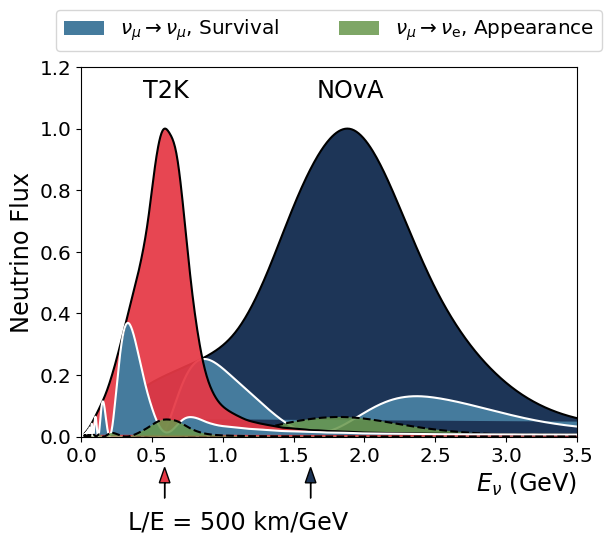

In [24]:
plt.xlim([0,3.5])
plt.ylim([0,1.2])
plt.fill(nova_logdx,nova_logdy, facecolor="#1d3557",zorder=1)
plt.plot(nova_logdx,nova_logdy, color="#000",zorder=1)
plt.fill(nova_logdx,dosc_novan,facecolor="#457b9d",zorder=1,label=r"$\nu_{\mu}\rightarrow\nu_{\mu}$, Survival")
plt.plot(nova_logdx,dosc_novan,color="#FFF",linestyle="solid",zorder=1)
plt.fill(nova_logdx,aosc_novan,facecolor="#6a994eDD",zorder=2,label=r"$\nu_{\mu}\rightarrow\nu_\mathrm{e}$, Appearance")
plt.plot(nova_logdx,aosc_novan,color="#000",linestyle="dashed",zorder=2)

plt.fill(t2k_logdx,t2k_logdy, facecolor="#e63946EE",zorder=3)
plt.plot(t2k_logdx,t2k_logdy, color="#000",zorder=3)
plt.fill(t2k_logdx,dosc_t2kn,facecolor="#457b9d",zorder=3)
plt.plot(t2k_logdx,dosc_t2kn,color="#FFF",linestyle="solid",zorder=3)
plt.fill(t2k_logdx,aosc_t2kn,facecolor="#6a994eDD",zorder=4)
plt.plot(t2k_logdx,aosc_t2kn,color="#000",linestyle="dashed",zorder=4)

plt.text(0.6,1.1,"T2K",fontsize="xx-large",horizontalalignment="center")
plt.text(1.9,1.1,"NOvA",fontsize="xx-large",horizontalalignment="center")

plt.legend(bbox_to_anchor=(-0.05, 1.03, 1.1, .125), 
                      ncol=2, mode="expand", borderaxespad=0.,
           fontsize="x-large",
          title="")

plt.xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
plt.xticks(fontsize="x-large")
plt.ylabel(r"Neutrino Flux",fontsize="xx-large")
plt.yticks(fontsize="x-large")

plt.arrow(0.59,-0.2,0,0.1,zorder=5,clip_on=False,
          facecolor="#e63946",
          length_includes_head=True,
          shape="full",
          head_width=0.075,head_length=0.05)

plt.arrow(1.62,-0.2,0,0.1,zorder=5,clip_on=False,
          facecolor="#1d3557",
          length_includes_head=True,
          shape="full",
          head_width=0.075,head_length=0.05)

plt.text((0.59+1.62)/2.0,-0.3,"L/E = 500 km/GeV",fontsize="xx-large",horizontalalignment="center")

# plt.show()
mydpi=300
# plt.figure(figsize=(800/mydpi, 800/mydpi), dpi=mydpi)
plt.savefig("t2knovafluxosc.png", bbox_inches='tight', dpi=mydpi)

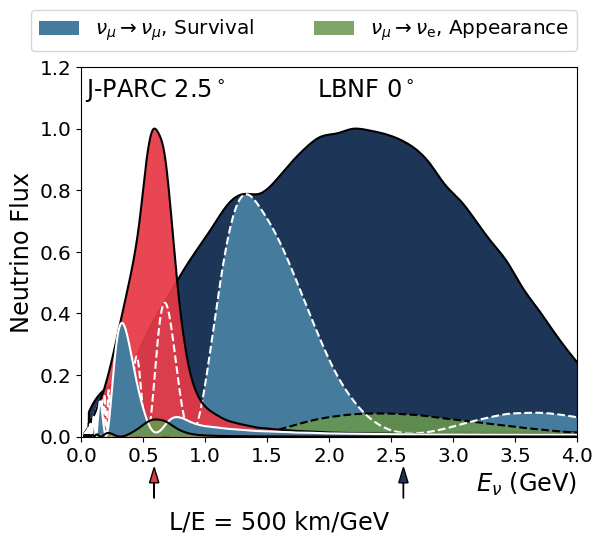

In [60]:
plt.xlim([0,4])
plt.ylim([0,1.2])
plt.fill(dune_logdx,dune_logdy, facecolor="#1d3557",zorder=1)
plt.plot(dune_logdx,dune_logdy, color="#000",zorder=1)
plt.fill(dune_logdx,dosc_dunen,facecolor="#457b9d",zorder=1,label=r"$\nu_{\mu}\rightarrow\nu_{\mu}$, Survival")
plt.plot(dune_logdx,dosc_dunen,color="#FFF",linestyle="dashed",zorder=3)
plt.fill(dune_logdx,aosc_dunen,facecolor="#6a994eDD",zorder=2,label=r"$\nu_{\mu}\rightarrow\nu_\mathrm{e}$, Appearance")
plt.plot(dune_logdx,aosc_dunen,color="#000",linestyle="dashed",zorder=2)

plt.fill(t2k_logdx,t2k_logdy, facecolor="#e63946EE",zorder=3)
plt.plot(t2k_logdx,t2k_logdy, color="#000",zorder=3)
plt.fill(t2k_logdx,dosc_t2kn,facecolor="#457b9d",zorder=4)
plt.plot(t2k_logdx,dosc_t2kn,color="#FFF",linestyle="solid",zorder=4)
plt.fill(t2k_logdx,aosc_t2kn,facecolor="#6a994eDD",zorder=4)
plt.plot(t2k_logdx,aosc_t2kn,color="#000",linestyle="solid",zorder=4)

plt.text(0.6,1.1,r"J-PARC $2.5^\circ$",fontsize="xx-large",horizontalalignment="center")
plt.text(2.3,1.1,r"LBNF $0^\circ$",fontsize="xx-large",horizontalalignment="center")

plt.legend(bbox_to_anchor=(-0.1, 1.03, 1.1, .125), 
                      ncol=2, mode="expand", borderaxespad=0.,
           fontsize="x-large",
          title="")

plt.xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
plt.xticks(fontsize="x-large")
plt.ylabel(r"Neutrino Flux",fontsize="xx-large")
plt.yticks(fontsize="x-large")

plt.arrow(0.59,-0.2,0,0.1,zorder=5,clip_on=False,
          facecolor="#e63946",
          length_includes_head=True,
          shape="full",
          head_width=0.075,head_length=0.05)

plt.arrow(2.6,-0.2,0,0.1,zorder=5,clip_on=False,
          facecolor="#1d3557",
          length_includes_head=True,
          shape="full",
          head_width=0.075,head_length=0.05)

plt.text((0.59+2.6)/2.0,-0.3,"L/E = 500 km/GeV",fontsize="xx-large",horizontalalignment="center")

# plt.show()
mydpi=300
# plt.figure(figsize=(800/mydpi, 800/mydpi), dpi=mydpi)
plt.savefig("t2kdunefluxosc.png", bbox_inches='tight', dpi=mydpi)

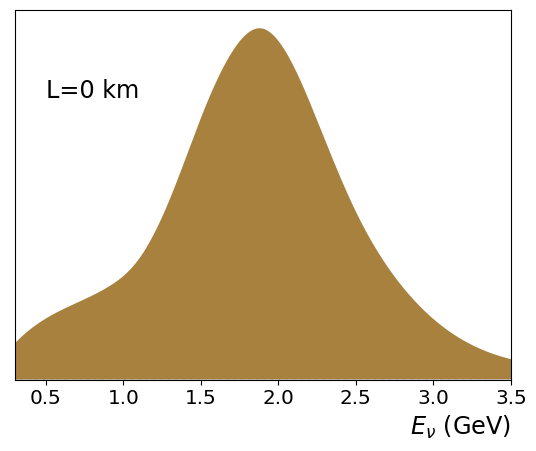

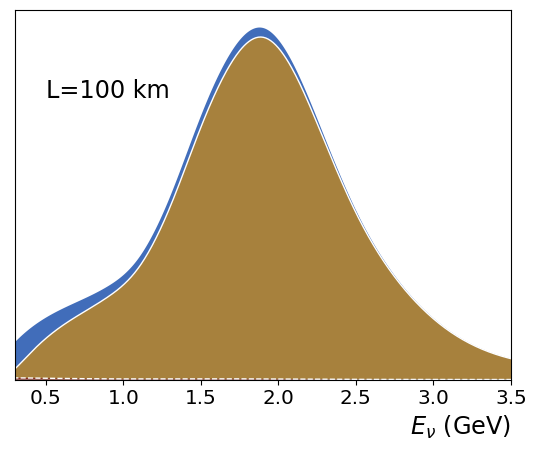

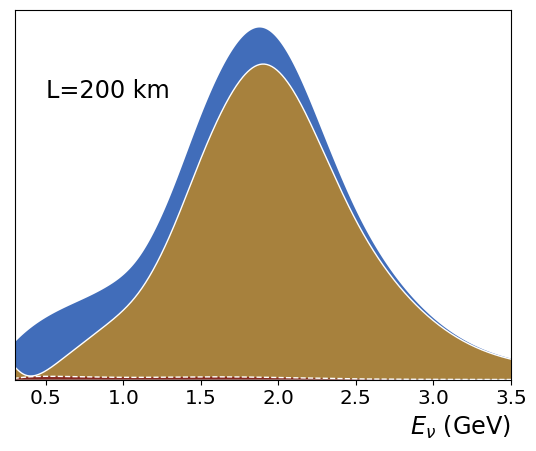

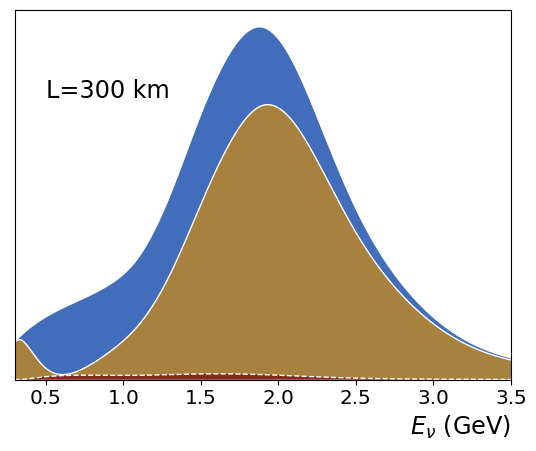

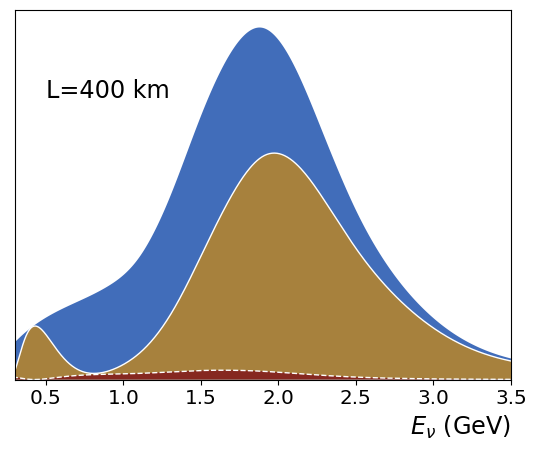

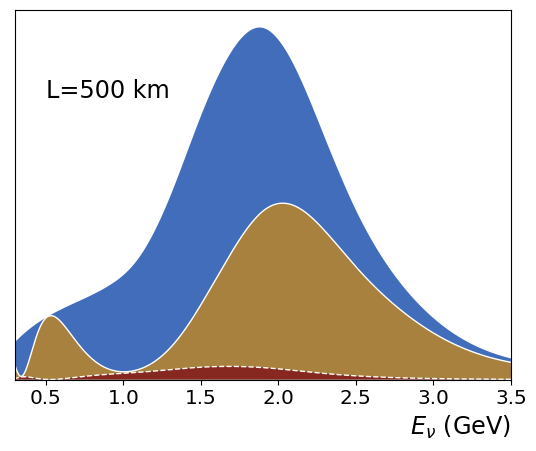

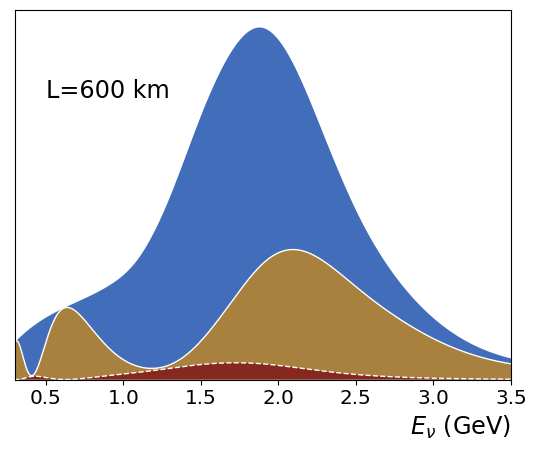

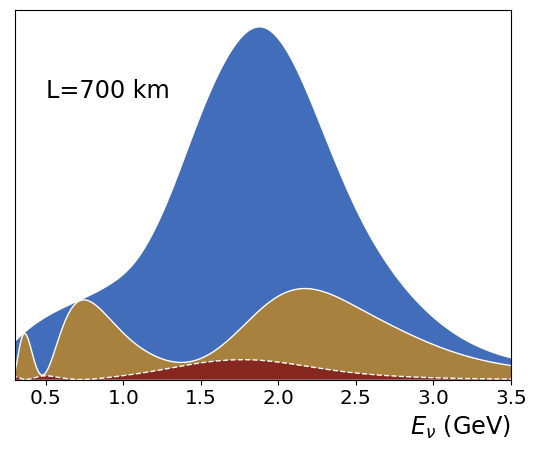

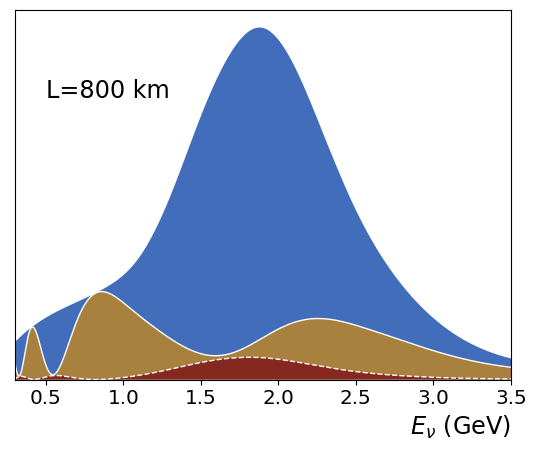

Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed

In [12]:
#red = #7e1219
#yellow = #c1871e
#blue = #416dba

for bl in [0,100,200,300,400,500,600,700,800]:
    wnf5_disp_nova = pn.Prob3plusplusWeightCalc()
    wnf5_disp_nova.set_parameters({"baseline_km": bl, "NuFit:5.2": 1, "osc:numu_disp":1})
    wnf5_app_nova = pn.Prob3plusplusWeightCalc()
    wnf5_app_nova.set_parameters({"baseline_km": bl, "NuFit:5.2": 1, "osc:numu_to_nue":1})
    wnf5_tau_nova = pn.Prob3plusplusWeightCalc()
    wnf5_tau_nova.set_parameters({"baseline_km": bl, "NuFit:5.2": 1, "osc:from":14, "osc:to":16})
    
    dosc_nova = [wnf5_disp_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
    aosc_nova = [wnf5_app_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
    tosc_nova = [wnf5_tau_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
    
    plt.xlim([nova_logd[0][0],3.5])
    plt.ylim([0,1.05])
    dosc_nova_st = np.add(dosc_nova,aosc_nova)
    tosc_nova_st = np.add(tosc_nova,dosc_nova_st)
    plt.fill(nova_logdx,tosc_nova_st,facecolor="#416dba",label=r"$\nu_{\tau}$",zorder=1)
    plt.fill(nova_logdx,dosc_nova_st,facecolor="#c1871eCC",label=r"$\nu_{\mu}$",zorder=1)
    plt.plot(nova_logdx,dosc_nova_st,color="#FFF",linewidth=1,zorder=2)
    plt.fill(nova_logdx,aosc_nova,facecolor="#7e1219CC",label=r"$\nu_\text{e}$",zorder=1)
    plt.plot(nova_logdx,aosc_nova,color="#FFF",linewidth=1,linestyle="dashed",zorder=2)
    
    # plt.legend(bbox_to_anchor=(0, 1.03, 1, .125), 
    #                       ncols=3, mode="expand", borderaxespad=0.,
    #            fontsize="x-large",
    #           title="")
    
    plt.xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
    plt.xticks(fontsize="x-large")
    plt.yticks([])
    # plt.ylabel(r"Neutrino Flux",fontsize="xx-large")
    # plt.yticks(fontsize="x-large")

    plt.text(0.5,0.8,"L=%s km" % bl,fontsize="xx-large",horizontalalignment="left")
    mydpi=300
    plt.savefig("example_osc_%s.png" % bl, bbox_inches='tight', dpi=mydpi)
    plt.show()

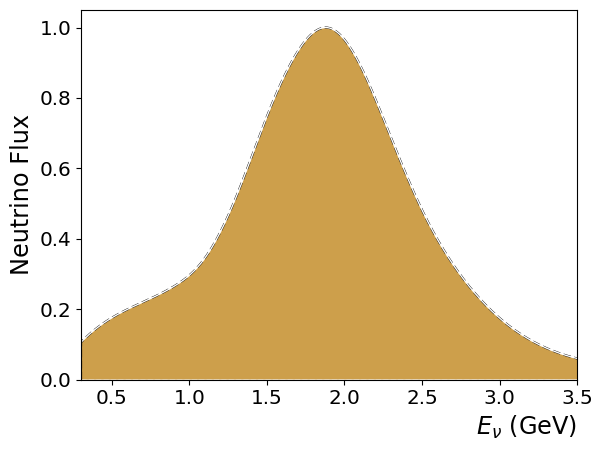

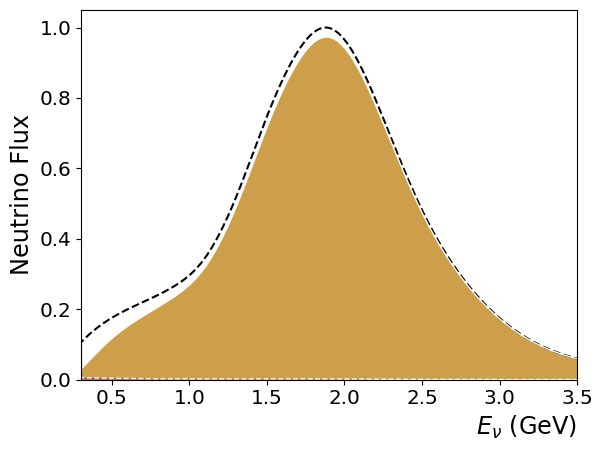

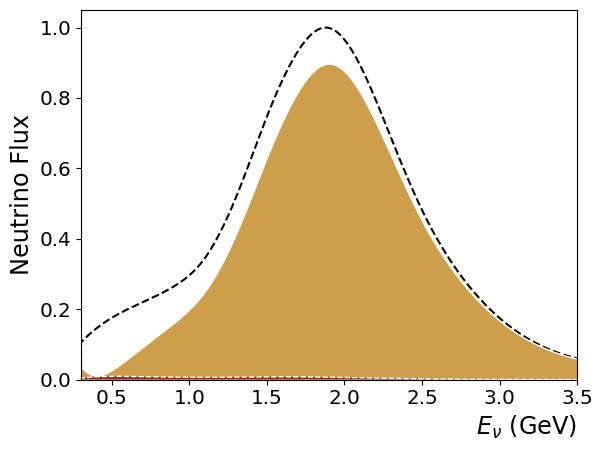

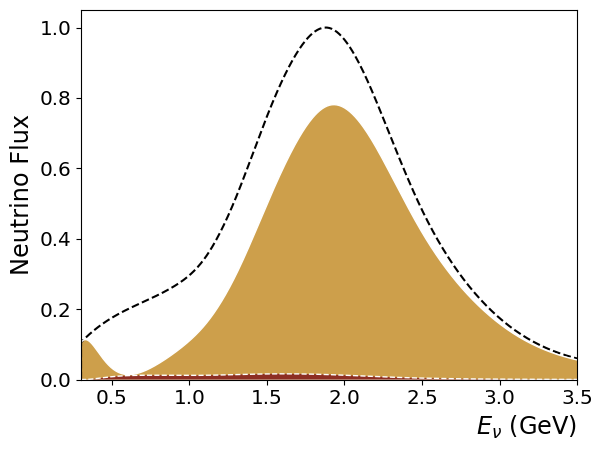

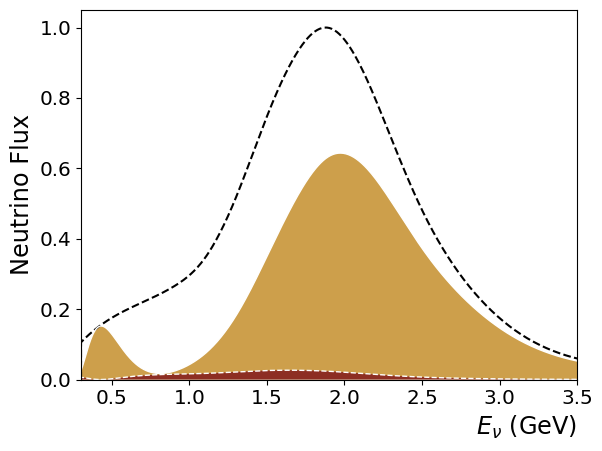

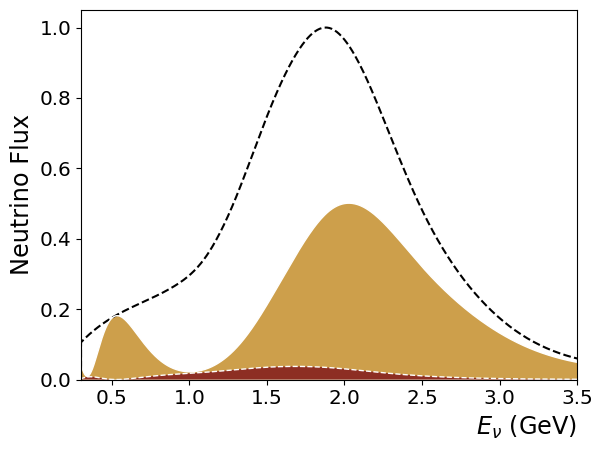

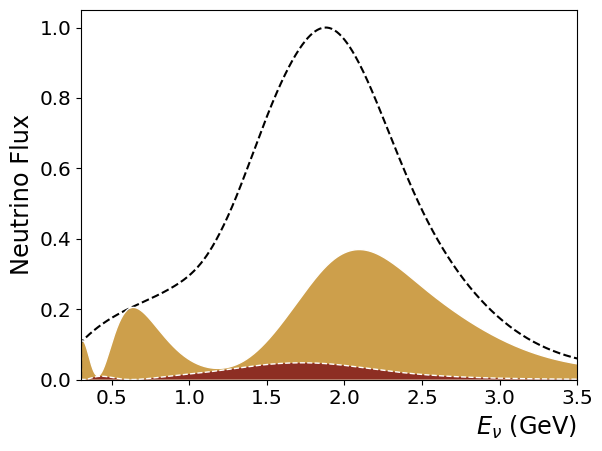

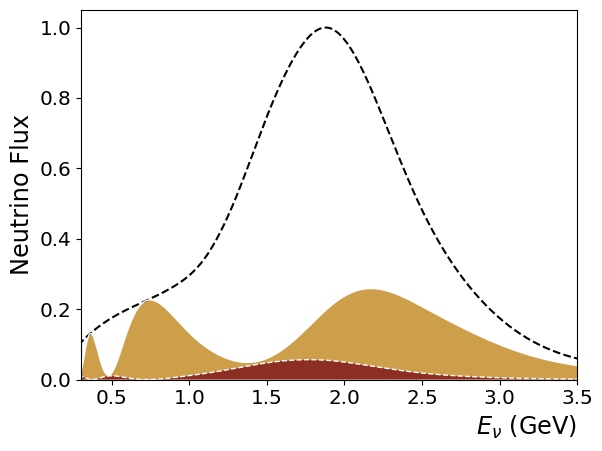

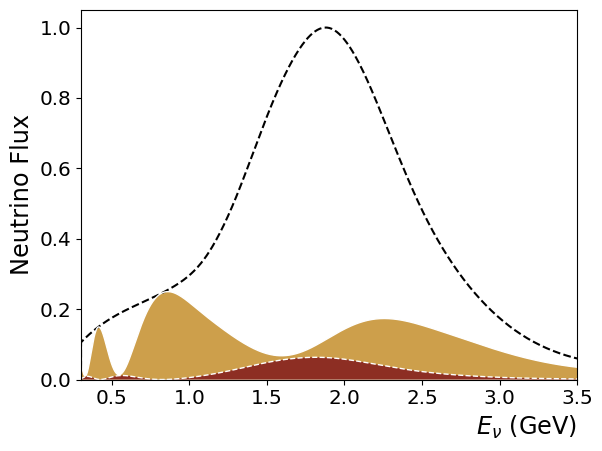

Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed

In [13]:
#red = #7e1219
#yellow = #c1871e
#blue = #416dba

for bl in [0,100,200,300,400,500,600,700,800]:
    wnf5_disp_nova = pn.Prob3plusplusWeightCalc()
    wnf5_disp_nova.set_parameters({"baseline_km": bl, "NuFit:5.2": 1, "osc:numu_disp":1})
    wnf5_app_nova = pn.Prob3plusplusWeightCalc()
    wnf5_app_nova.set_parameters({"baseline_km": bl, "NuFit:5.2": 1, "osc:numu_to_nue":1})
    wnf5_tau_nova = pn.Prob3plusplusWeightCalc()
    wnf5_tau_nova.set_parameters({"baseline_km": bl, "NuFit:5.2": 1, "osc:from":14, "osc:to":16})
    
    dosc_nova = [wnf5_disp_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
    aosc_nova = [wnf5_app_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
    tosc_nova = [wnf5_tau_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
    
    plt.xlim([nova_logd[0][0],3.5])
    plt.ylim([0,1.05])
    dosc_nova_st = np.add(dosc_nova,aosc_nova)
    tosc_nova_st = np.add(tosc_nova,dosc_nova_st)
    plt.plot(nova_logdx,tosc_nova_st,color="#000",linestyle="dashed",label=r"$\nu_{\tau}$",zorder=1)
    plt.fill(nova_logdx,dosc_nova_st,facecolor="#c1871eCC",label=r"$\nu_{\mu}$",zorder=1)
    plt.plot(nova_logdx,dosc_nova_st,color="#FFF",linewidth=1,zorder=2)
    plt.fill(nova_logdx,aosc_nova,facecolor="#7e1219CC",label=r"$\nu_\text{e}$",zorder=1)
    plt.plot(nova_logdx,aosc_nova,color="#FFF",linewidth=1,linestyle="dashed",zorder=2)
    
    # plt.legend(bbox_to_anchor=(0, 1.03, 1, .125), 
    #                       ncols=3, mode="expand", borderaxespad=0.,
    #            fontsize="x-large",
    #           title="")
    
    plt.xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
    plt.xticks(fontsize="x-large")
    # plt.yticks([])
    plt.ylabel(r"Neutrino Flux",fontsize="xx-large")
    plt.yticks(fontsize="x-large")

    # plt.text(0.5,0.8,"L=%s km" % bl,fontsize="xx-large",horizontalalignment="left")
    mydpi=300
    plt.savefig("example_osc_disp_%s.png" % bl, bbox_inches='tight', dpi=mydpi)
    plt.show()

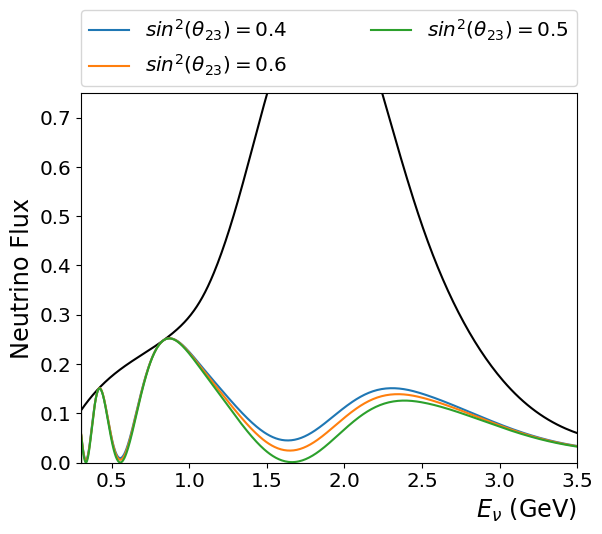

Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!


In [15]:
wnf5_disp_nova = pn.Prob3plusplusWeightCalc()
wnf5_disp_nova.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_nova.set_parameters({"sinsq_th23":0.4})

wnf5_disp_novap = pn.Prob3plusplusWeightCalc()
wnf5_disp_novap.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_novap.set_parameters({"sinsq_th23":0.6})

wnf5_disp_novam = pn.Prob3plusplusWeightCalc()
wnf5_disp_novam.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_novam.set_parameters({"sinsq_th23":0.5})

dosc_nova = [wnf5_disp_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
dosc_novap = [wnf5_disp_novap.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
dosc_novam = [wnf5_disp_novam.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]

plt.xlim([nova_logd[0][0],3.5])
plt.ylim([0,0.75])

plt.plot(nova_logdx, nova_logdy, color="#000")
plt.plot(nova_logdx, dosc_nova, label=r"$sin^{2}(\theta_{23}) = 0.4$")
plt.plot(nova_logdx, dosc_novap, label=r"$sin^{2}(\theta_{23}) = 0.6$")
plt.plot(nova_logdx, dosc_novam, label=r"$sin^{2}(\theta_{23}) = 0.5$")

plt.legend(bbox_to_anchor=(0, 1.1, 1, .125), 
                      ncol=2, mode="expand", borderaxespad=0.,
           fontsize="x-large",
          title="")

plt.xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
plt.xticks(fontsize="x-large")
plt.ylabel(r"Neutrino Flux",fontsize="xx-large")
plt.yticks(fontsize="x-large")

# plt.text(0.5,0.8,"L=%s km" % bl,fontsize="xx-large",horizontalalignment="left")
mydpi=300
plt.savefig("example_osc_th23.png", bbox_inches='tight', dpi=mydpi)
plt.show()

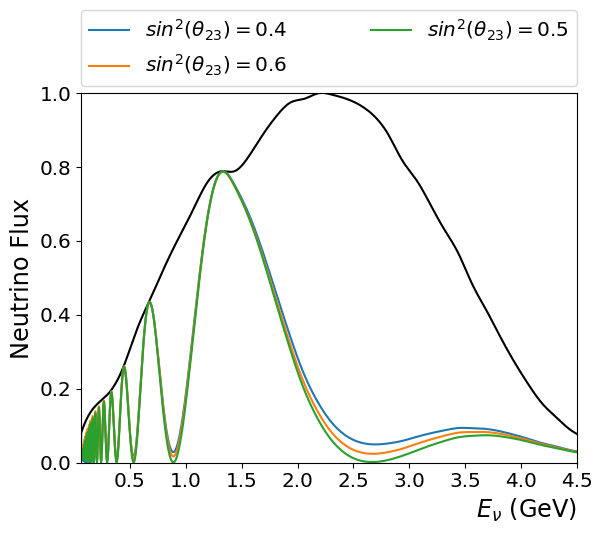

Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!


In [68]:
wnf5_disp_dune = pn.Prob3plusplusWeightCalc()
wnf5_disp_dune.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_dune.set_parameters({"sinsq_th23":0.4})

wnf5_disp_dunep = pn.Prob3plusplusWeightCalc()
wnf5_disp_dunep.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_dunep.set_parameters({"sinsq_th23":0.6})

wnf5_disp_dunem = pn.Prob3plusplusWeightCalc()
wnf5_disp_dunem.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_dunem.set_parameters({"sinsq_th23":0.5})

dosc_dune = [wnf5_disp_dune.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
dosc_dunep = [wnf5_disp_dunep.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
dosc_dunem = [wnf5_disp_dunem.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]

plt.xlim([dune_logd[0][0],4.5])
plt.ylim([0,1])

plt.plot(dune_logdx, dune_logdy, color="#000")
plt.plot(dune_logdx, dosc_dune, label=r"$sin^{2}(\theta_{23}) = 0.4$")
plt.plot(dune_logdx, dosc_dunep, label=r"$sin^{2}(\theta_{23}) = 0.6$")
plt.plot(dune_logdx, dosc_dunem, label=r"$sin^{2}(\theta_{23}) = 0.5$")

plt.legend(bbox_to_anchor=(0, 1.1, 1, .125), 
                      ncol=2, mode="expand", borderaxespad=0.,
           fontsize="x-large",
          title="")

plt.xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
plt.xticks(fontsize="x-large")
plt.ylabel(r"Neutrino Flux",fontsize="xx-large")
plt.yticks(fontsize="x-large")

# plt.text(0.5,0.8,"L=%s km" % bl,fontsize="xx-large",horizontalalignment="left")
mydpi=300
plt.savefig("example_osc_th23.png", bbox_inches='tight', dpi=mydpi)
plt.show()

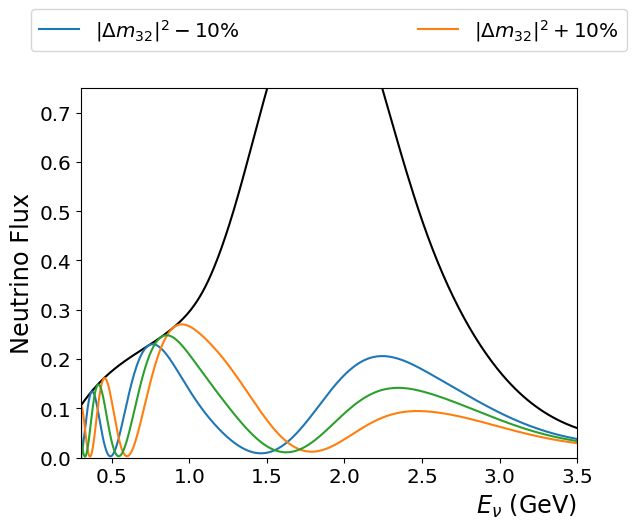

Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!


In [17]:
wnf5_disp_nova = pn.Prob3plusplusWeightCalc()
wnf5_disp_nova.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_nova.set_parameters({"dmsq_atm":2.463E-3})

wnf5_disp_novap = pn.Prob3plusplusWeightCalc()
wnf5_disp_novap.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_novap.set_parameters({"dmsq_atm":2.463E-3*1.1})

wnf5_disp_novam = pn.Prob3plusplusWeightCalc()
wnf5_disp_novam.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_novam.set_parameters({"dmsq_atm":2.463E-3*0.9})

dosc_nova = [wnf5_disp_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
dosc_novap = [wnf5_disp_novap.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
dosc_novam = [wnf5_disp_novam.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]

plt.xlim([nova_logd[0][0],3.5])
plt.ylim([0,0.75])

plt.plot(nova_logdx, nova_logdy, color="#000")
plt.plot(nova_logdx, dosc_novam, label=r"$\left|\Delta{}m_{32}\right|^{2} - 10\%$")
plt.plot(nova_logdx, dosc_novap, label=r"$\left|\Delta{}m_{32}\right|^{2} + 10\%$")
plt.plot(nova_logdx, dosc_nova)

plt.legend(bbox_to_anchor=(-0.1, 1.1, 1.2, .125), 
                      ncol=2, mode="expand", borderaxespad=0.,
           fontsize="x-large",
          title="")

plt.xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
plt.xticks(fontsize="x-large")
plt.ylabel(r"Neutrino Flux",fontsize="xx-large")
plt.yticks(fontsize="x-large")

# plt.text(0.5,0.8,"L=%s km" % bl,fontsize="xx-large",horizontalalignment="left")
mydpi=300
plt.savefig("example_osc_dm32.png", bbox_inches='tight', dpi=mydpi)
plt.show()

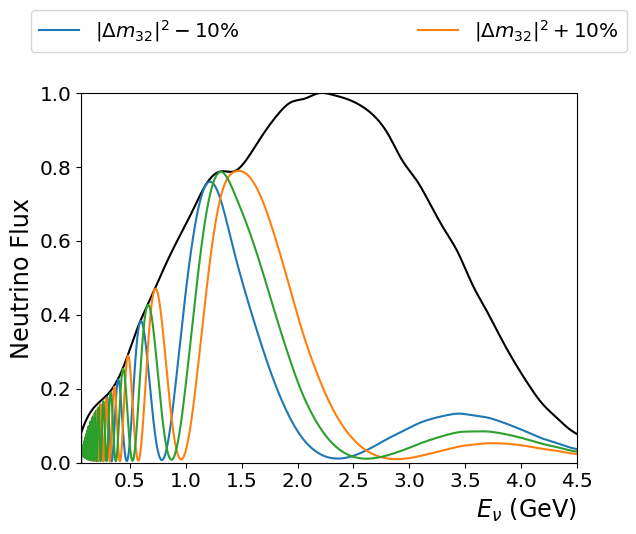

Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!


In [67]:
wnf5_disp_dune = pn.Prob3plusplusWeightCalc()
wnf5_disp_dune.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_dune.set_parameters({"dmsq_atm":2.463E-3})

wnf5_disp_dunep = pn.Prob3plusplusWeightCalc()
wnf5_disp_dunep.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_dunep.set_parameters({"dmsq_atm":2.463E-3*1.1})

wnf5_disp_dunem = pn.Prob3plusplusWeightCalc()
wnf5_disp_dunem.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_disp":1})
wnf5_disp_dunem.set_parameters({"dmsq_atm":2.463E-3*0.9})

dosc_dune = [wnf5_disp_dune.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
dosc_dunep = [wnf5_disp_dunep.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
dosc_dunem = [wnf5_disp_dunem.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]

plt.xlim([dune_logd[0][0],4.5])
plt.ylim([0,1])

plt.plot(dune_logdx, dune_logdy, color="#000")
plt.plot(dune_logdx, dosc_dunem, label=r"$\left|\Delta{}m_{32}\right|^{2} - 10\%$")
plt.plot(dune_logdx, dosc_dunep, label=r"$\left|\Delta{}m_{32}\right|^{2} + 10\%$")
plt.plot(dune_logdx, dosc_dune)

plt.legend(bbox_to_anchor=(-0.1, 1.1, 1.2, .125), 
                      ncol=2, mode="expand", borderaxespad=0.,
           fontsize="x-large",
          title="")

plt.xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
plt.xticks(fontsize="x-large")
plt.ylabel(r"Neutrino Flux",fontsize="xx-large")
plt.yticks(fontsize="x-large")

# plt.text(0.5,0.8,"L=%s km" % bl,fontsize="xx-large",horizontalalignment="left")
mydpi=300
plt.savefig("example_osc_dm32.png", bbox_inches='tight', dpi=mydpi)
plt.show()

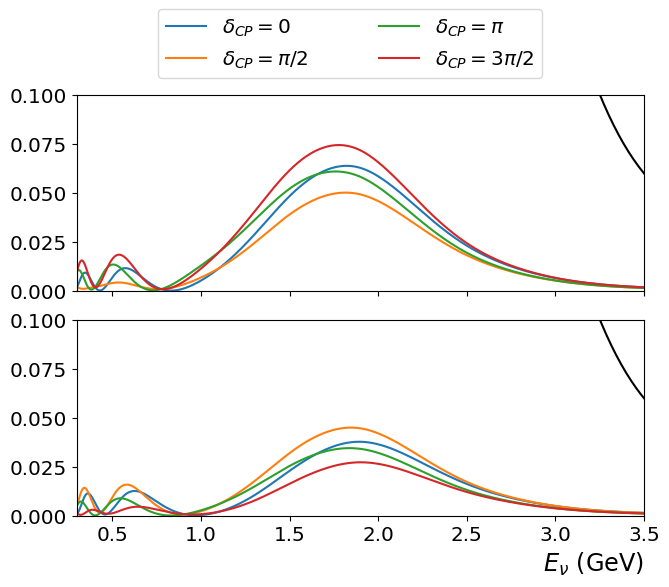

Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!


In [19]:
wnf5_app_nova = pn.Prob3plusplusWeightCalc()
wnf5_app_nova.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_to_nue":1})
wnf5_app_nova.set_parameters({"dcp_npi":0})

wnf5_app_novap = pn.Prob3plusplusWeightCalc()
wnf5_app_novap.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_to_nue":1})
wnf5_app_novap.set_parameters({"dcp_npi":0.5})

wnf5_app_novam = pn.Prob3plusplusWeightCalc()
wnf5_app_novam.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_to_nue":1})
wnf5_app_novam.set_parameters({"dcp_npi":-0.5})

wnf5_app_novam2 = pn.Prob3plusplusWeightCalc()
wnf5_app_novam2.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:numu_to_nue":1})
wnf5_app_novam2.set_parameters({"dcp_npi":1})

wnf5_appb_nova = pn.Prob3plusplusWeightCalc()
wnf5_appb_nova.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:from":-14, "osc:to":-12})
wnf5_appb_nova.set_parameters({"dcp_npi":0})

wnf5_appb_novap = pn.Prob3plusplusWeightCalc()
wnf5_appb_novap.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:from":-14, "osc:to":-12})
wnf5_appb_novap.set_parameters({"dcp_npi":0.5})

wnf5_appb_novam = pn.Prob3plusplusWeightCalc()
wnf5_appb_novam.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:from":-14, "osc:to":-12})
wnf5_appb_novam.set_parameters({"dcp_npi":-0.5})

wnf5_appb_novam2 = pn.Prob3plusplusWeightCalc()
wnf5_appb_novam2.set_parameters({"baseline_km": 810, "NuFit:5.2": 1, "osc:from":-14, "osc:to":-12})
wnf5_appb_novam2.set_parameters({"dcp_npi":1})


aosc_nova = [wnf5_app_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
aosc_novap = [wnf5_app_novap.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
aosc_novam = [wnf5_app_novam.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
aosc_novam2 = [wnf5_app_novam2.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]

abosc_nova = [wnf5_appb_nova.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
abosc_novap = [wnf5_appb_novap.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
abosc_novam = [wnf5_appb_novam.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]
abosc_novam2 = [wnf5_appb_novam2.prob(x)*y for x,y in zip(nova_logd[0],nova_logd[1])]

fig, (ax_app, ax_appb) = plt.subplots(2,1,sharex=True)
plt.tight_layout()

ax_app.set_xlim([nova_logd[0][0],3.5])
ax_app.set_ylim([0,0.1])

ax_appb.set_xlim([nova_logd[0][0],3.5])
ax_appb.set_ylim([0,0.1])

ax_app.plot(nova_logdx, nova_logdy, color="#000")
ax_app.plot(nova_logdx, aosc_nova, label=r"$\delta_{CP} = 0$")
ax_app.plot(nova_logdx, aosc_novap, label=r"$\delta_{CP} = \pi/2$")
ax_app.plot(nova_logdx, aosc_novam2, label=r"$\delta_{CP} = \pi$")
ax_app.plot(nova_logdx, aosc_novam, label=r"$\delta_{CP} = 3\pi/2$")

ax_appb.plot(nova_logdx, nova_logdy, color="#000")
ax_appb.plot(nova_logdx, abosc_nova)
ax_appb.plot(nova_logdx, abosc_novap)
ax_appb.plot(nova_logdx, abosc_novam2)
ax_appb.plot(nova_logdx, abosc_novam)

fig.legend(bbox_to_anchor=(0.2, 1.03, 0.6, .105), 
                      ncol=2, mode="expand", borderaxespad=0.,
           fontsize="x-large",
          title="")

ax_appb.set_xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
ax_appb.xaxis.set_tick_params(labelsize="x-large")
ax_appb.yaxis.set_tick_params(labelsize="x-large")
ax_app.yaxis.set_tick_params(labelsize="x-large")

mydpi=300
plt.savefig("example_osc_dcp.png", bbox_inches='tight', dpi=mydpi)
plt.show()

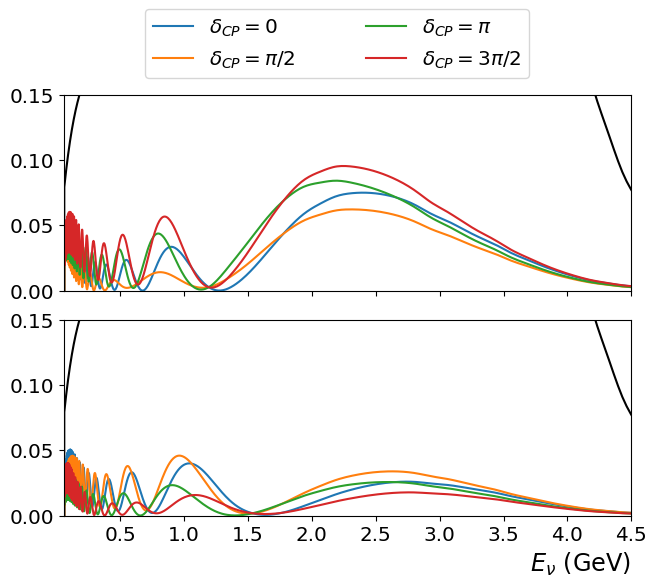

Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!
Only Concrete Python instances allowed as dict inputs to YAML conversion!


In [71]:
wnf5_app_dune = pn.Prob3plusplusWeightCalc()
wnf5_app_dune.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_to_nue":1})
wnf5_app_dune.set_parameters({"dcp_npi":0})

wnf5_app_dunep = pn.Prob3plusplusWeightCalc()
wnf5_app_dunep.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_to_nue":1})
wnf5_app_dunep.set_parameters({"dcp_npi":0.5})

wnf5_app_dunem = pn.Prob3plusplusWeightCalc()
wnf5_app_dunem.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_to_nue":1})
wnf5_app_dunem.set_parameters({"dcp_npi":-0.5})

wnf5_app_dunem2 = pn.Prob3plusplusWeightCalc()
wnf5_app_dunem2.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:numu_to_nue":1})
wnf5_app_dunem2.set_parameters({"dcp_npi":1})

wnf5_appb_dune = pn.Prob3plusplusWeightCalc()
wnf5_appb_dune.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:from":-14, "osc:to":-12})
wnf5_appb_dune.set_parameters({"dcp_npi":0})

wnf5_appb_dunep = pn.Prob3plusplusWeightCalc()
wnf5_appb_dunep.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:from":-14, "osc:to":-12})
wnf5_appb_dunep.set_parameters({"dcp_npi":0.5})

wnf5_appb_dunem = pn.Prob3plusplusWeightCalc()
wnf5_appb_dunem.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:from":-14, "osc:to":-12})
wnf5_appb_dunem.set_parameters({"dcp_npi":-0.5})

wnf5_appb_dunem2 = pn.Prob3plusplusWeightCalc()
wnf5_appb_dunem2.set_parameters({"baseline_km": 1300, "NuFit:5.2": 1, "osc:from":-14, "osc:to":-12})
wnf5_appb_dunem2.set_parameters({"dcp_npi":1})


aosc_dune = [wnf5_app_dune.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
aosc_dunep = [wnf5_app_dunep.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
aosc_dunem = [wnf5_app_dunem.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
aosc_dunem2 = [wnf5_app_dunem2.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]

abosc_dune = [wnf5_appb_dune.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
abosc_dunep = [wnf5_appb_dunep.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
abosc_dunem = [wnf5_appb_dunem.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]
abosc_dunem2 = [wnf5_appb_dunem2.prob(x)*y for x,y in zip(dune_logd[0],dune_logd[1])]

fig, (ax_app, ax_appb) = plt.subplots(2,1,sharex=True)
plt.tight_layout()

ax_app.set_xlim([dune_logd[0][0],4.5])
ax_app.set_ylim([0,0.15])

ax_appb.set_xlim([dune_logd[0][0],4.5])
ax_appb.set_ylim([0,0.15])

ax_app.plot(dune_logdx, dune_logdy, color="#000")
ax_app.plot(dune_logdx, aosc_dune, label=r"$\delta_{CP} = 0$")
ax_app.plot(dune_logdx, aosc_dunep, label=r"$\delta_{CP} = \pi/2$")
ax_app.plot(dune_logdx, aosc_dunem2, label=r"$\delta_{CP} = \pi$")
ax_app.plot(dune_logdx, aosc_dunem, label=r"$\delta_{CP} = 3\pi/2$")

ax_appb.plot(dune_logdx, dune_logdy, color="#000")
ax_appb.plot(dune_logdx, abosc_dune)
ax_appb.plot(dune_logdx, abosc_dunep)
ax_appb.plot(dune_logdx, abosc_dunem2)
ax_appb.plot(dune_logdx, abosc_dunem)

fig.legend(bbox_to_anchor=(0.2, 1.03, 0.6, .105), 
                      ncol=2, mode="expand", borderaxespad=0.,
           fontsize="x-large",
          title="")

ax_appb.set_xlabel(r"$E_{\nu}$ (GeV)",fontsize="xx-large",loc="right")
ax_appb.xaxis.set_tick_params(labelsize="x-large")
ax_appb.yaxis.set_tick_params(labelsize="x-large")
ax_app.yaxis.set_tick_params(labelsize="x-large")

mydpi=300
plt.savefig("example_osc_dcp.png", bbox_inches='tight', dpi=mydpi)
plt.show()